In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Q.Increase Brightness

In [14]:
image = cv2.imread('dog.jpg')

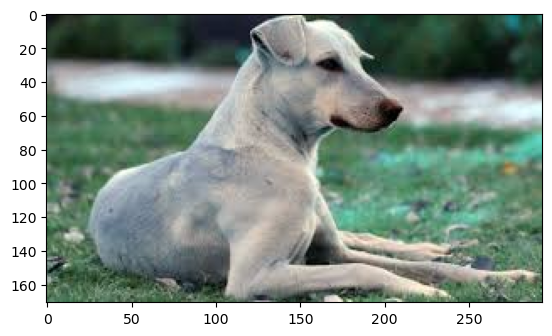

In [15]:
plt.imshow(image)
plt.show()

For modifying brightness HSV format is used

hue, saturation and value

change in value changes brightness

In [16]:

brightness_value = 50 

# ==== RGB (BGR in OpenCV) Approach ====
bgr_bright = cv2.add(image, np.full(image.shape, brightness_value, dtype=np.uint8))

# ==== HSV Approach ====
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)# need to split and then merge
v = cv2.add(v, brightness_value)
hsv_bright = cv2.merge((h, s, v))
bright_image_hsv = cv2.cvtColor(hsv_bright, cv2.COLOR_HSV2BGR)

# ==== Display Results ====
cv2.imshow("Original Image", image)
cv2.imshow("Brightness via BGR", bgr_bright)
cv2.imshow("Brightness via HSV", bright_image_hsv)
plt.show()

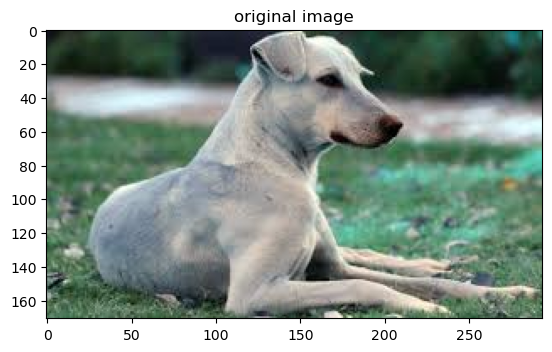

In [23]:
plt.imshow(image)
plt.title('original image')
plt.show()

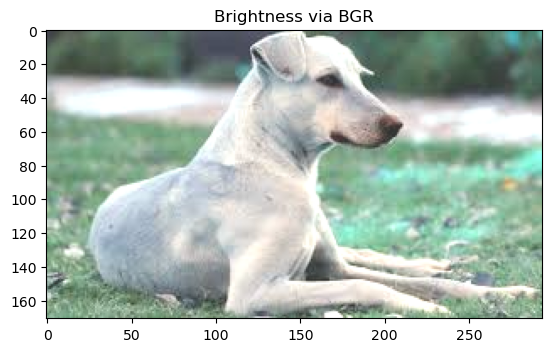

In [24]:
plt.imshow(bgr_bright)
plt.title("Brightness via BGR")
plt.show()

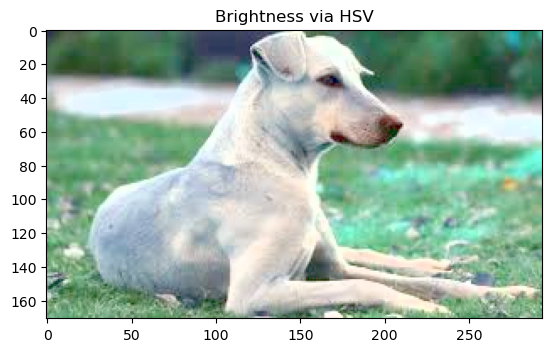

: 

In [ ]:
plt.imshow(bright_image_hsv)
plt.title("Brightness via HSV")
plt.show()